In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/data.csv')
df

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...,...,...
831,831,Karbonn K24 Plus Pro,3.8,6.0,32.0,4.54,48,12.0,2800,1299
832,832,InFocus POWER 2,4.1,8.0,64.0,4.54,64,NaN,2500,1390
833,833,"Alcatel 5V (Spectrum Blue, 32 )",4.4,3.0,32.0,6.20,48,1.0,3800,9790
834,834,JIVI JV 12M,3.7,10.0,32.0,4.50,64,NaN,3500,799


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.sum()

Brand me         LG V30+ (Black, 128 )I Kall K11Nokia 105 ssSam...
Ratings                                                     3303.0
RAM                                                         5029.0
ROM                                                        53558.4
Mobile_Size                                               4668.133
Primary_Cam                                                  40114
Selfi_Cam                                                   5548.0
Battery_Power                                              2737640
Price                                                     15232210
dtype: object

In [ ]:
df.isnull().sum()

Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [ ]:
df.mean()

<ipython-input-7-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Ratings              4.103106
RAM                  6.066345
ROM                 64.373077
Mobile_Size          5.597282
Primary_Cam         47.983254
Selfi_Cam            9.784832
Battery_Power     3274.688995
Price            18220.346890
dtype: float64

In [ ]:
df.drop(['Brand me'],axis=1,inplace=True)

In [ ]:
# Fill up the mean values of all the missing value columns into the dataset
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mean())
df['RAM'] = df['RAM'].fillna(df['RAM'].mean())
df['ROM'] = df['ROM'].fillna(df['ROM'].mean())
df['Mobile_Size'] = df['Mobile_Size'].fillna(df['Mobile_Size'].mean())
df['Selfi_Cam'] = df['Selfi_Cam'].fillna(df['Selfi_Cam'].mean())

In [ ]:
df['RAM'] = df['RAM'].astype('int64')
df['ROM'] = df['ROM'].astype('int64')
df['Selfi_Cam'] = df['Selfi_Cam'].astype('int64')

Exploratory Data Analysis


Let's Understand about the Features
1. Brand me This is first feature of our dataset. It's Denotes name of the mobile phones and Brands.
2.Ratings This Feature Denotes Number of the ratings gave by the consumers for each mobile.
3.RAM It's have RAM size of the phone.
4.ROM It's have ROM (Internal Memory) size of the phone.
5.Mobile_Size It's represents how many inches of the particular mobile phone have. Here all the values are gave in inches
6.Primary_Cam It's Denotes Number of the pixels of the primary camera (Back Camera) for each mobiles.
7.Selfi_Cam It's Denotes Number of the pixels of the Selfi camera (Front Camera) for each mobiles.
8.Battery_Power It's Denotes amount of the battery power in each mobiles in mAh.
9.Price It's a Dependent Feature of the dataset. It's just denote prices of the each mobiles.

<Axes: >

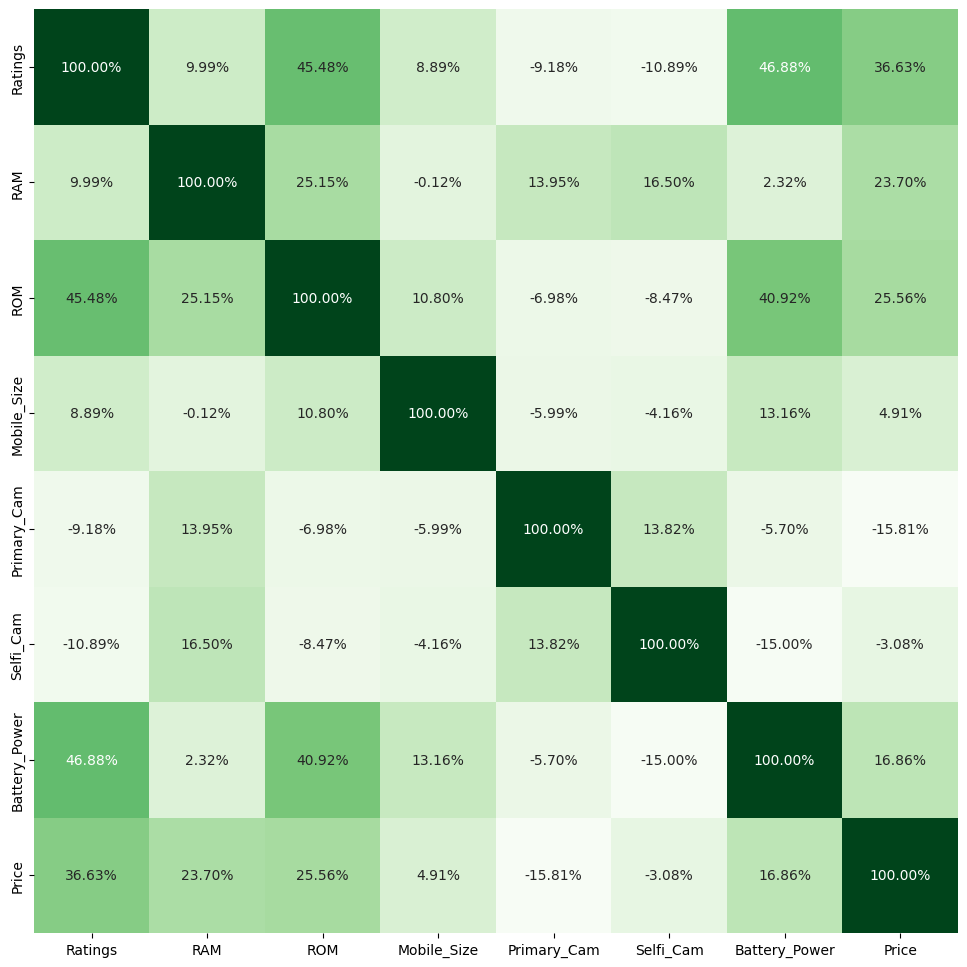

In [ ]:
# Plotting the heatmap of correlation between features
import seaborn as sns
# Finding out the correlation between the features
corr = df.corr()
corr.shape
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')


feature selction


In [ ]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

<ipython-input-13-c09fd401a267>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


[0.1190274  0.10598174 0.26471552 0.08307769 0.22393549 0.20326216]


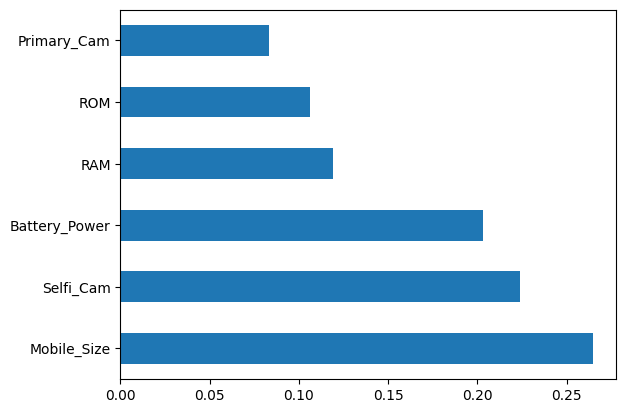

In [ ]:
X = df.iloc[:,1:7]  # Independent columns
y = df.iloc[:,[-1]] # Yarget column i.e price range
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
# Fiting Feature Seclection using Ensemble Methods
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores
print(model.feature_importances_)
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
x = df.iloc[:,[6,2,4,5,3]]
y = df.iloc[:,[-1]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(627, 5)
(209, 5)
(627, 1)
(209, 1)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create an Extra Tree Regressor instance
regressor = ExtraTreesRegressor()

# Train the regressor
regressor.fit(x_train, y_train)
# Make predictions on the testing set
y_pred = regressor.predict(x_test)

# Evaluate the accuracy of the predictions
mse = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2_1)

Mean Squared Error: 196518815.9425383
R-squared Score: 0.9462744813076516


<ipython-input-16-5856dcb05110>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
model = OrthogonalMatchingPursuit()

# Train the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2_2)

Mean Squared Error: 3592468319.9030523
R-squared Score: 0.017868986504294915


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
regressor = GradientBoostingRegressor()

# Train the regressor
regressor.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2_3)


Mean Squared Error: 443570950.8028755
R-squared Score: 0.8787338540869755


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Create an XGBoost model instance
model = xgb.XGBRegressor()

# Train the model
model.fit(x_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(x_test)

# Evaluate the accuracy of the predictions
mse = mean_squared_error(y_test, y_pred)
r2_4 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2_4)



Mean Squared Error: 152054273.07661572
R-squared Score: 0.9584304706333167


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Create a Decision Tree Regressor instance
regressor = DecisionTreeRegressor()

# Train the regressor
regressor.fit(x_train, y_train)
# Make predictions on the testing set
y_pred = regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_5 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2_5)


Mean Squared Error: 327875350.3542072
R-squared Score: 0.9103634266279829


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Create an AdaBoost Regressor instance
regressor = AdaBoostRegressor()

# Train the regressor
regressor.fit(x_train, y_train)
# Make predictions on the testing set
y_pred = regressor.predict(x_test)

# Evaluate the accuracy of the predictions
mse = mean_squared_error(y_test, y_pred)
r2_6 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2_6)


Mean Squared Error: 955667564.6432315
R-squared Score: 0.7387337423052465


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Create a Random Forest Regressor instance
regressor = RandomForestRegressor()

# Train the regressor
regressor.fit(x_train, y_train)
# Make predictions on the testing set
y_pred = regressor.predict(x_test)

# Evaluate the accuracy of the predictions
mse = mean_squared_error(y_test, y_pred)
r2_7 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2_7)



<ipython-input-22-1ad94104c003>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


Mean Squared Error: 365772186.6996662
R-squared Score: 0.9000029571752555


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Create a K Neighbors Regressor instance
regressor = KNeighborsRegressor(n_neighbors=5)

# Train the regressor
regressor.fit(x_train, y_train)
# Make predictions on the testing set
y_pred = regressor.predict(x_test)

# Evaluate the accuracy of the predictions
mse = mean_squared_error(y_test, y_pred)
r2_8 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2_8)


Mean Squared Error: 2686701955.6882296
R-squared Score: 0.26549294809865365


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Create a Linear Regression model instance
regressor = LinearRegression()

# Train the model
regressor.fit(x_train, y_train)
# Make predictions on the testing set
y_pred = regressor.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2_9 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2_9)



Mean Squared Error: 3358120108.096864
R-squared Score: 0.08193653735699913


Both metrics should be considered when evaluating model performance. A high R2 score indicates a good fit, while a low MSE indicates accurate predictions. However, it's important to interpret and assess these metrics in the context of the specific problem, considering the scale of the target variable and any domain-specific requirements or thresholds.


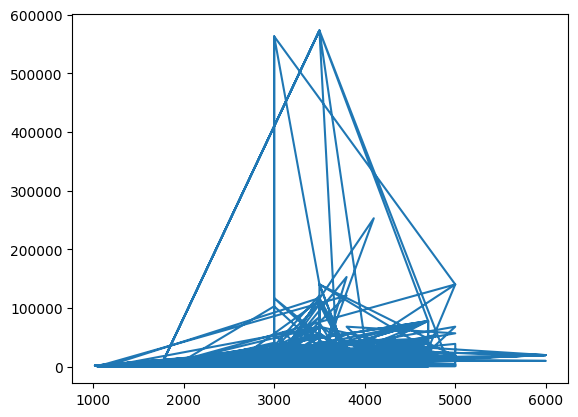

In [ ]:
plt.plot(df.iloc[:,6],df.iloc[:,[-1]])

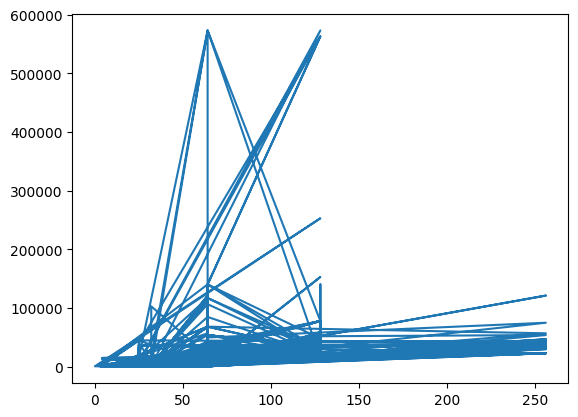

In [ ]:
plt.plot(df.iloc[:,2],df.iloc[:,[-1]])

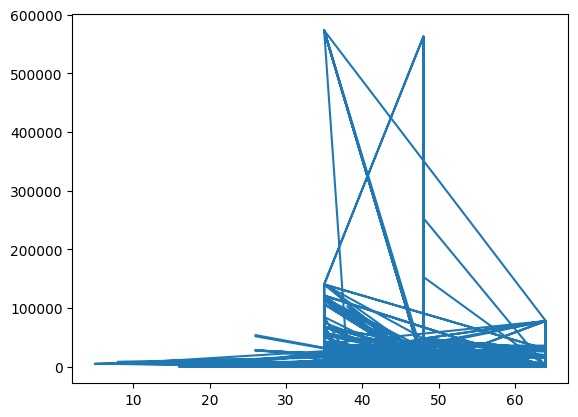

In [ ]:
plt.plot(df.iloc[:,4],df.iloc[:,[-1]])

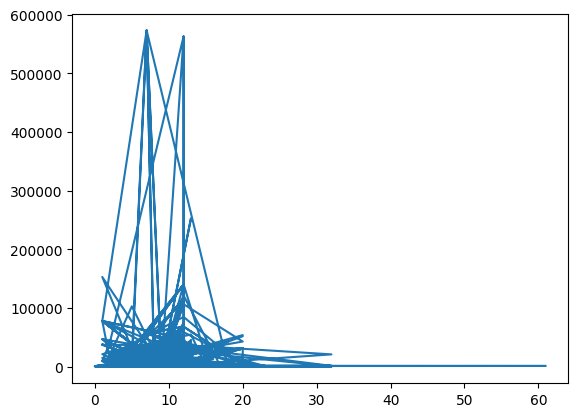

In [ ]:
plt.plot(df.iloc[:,5],df.iloc[:,[-1]])

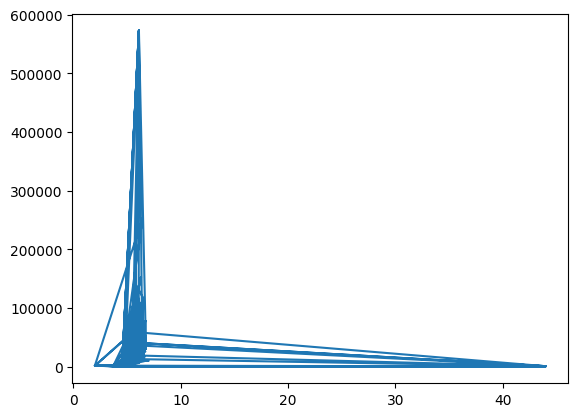

In [ ]:
plt.plot(df.iloc[:,3],df.iloc[:,[-1]])

In [ ]:
import matplotlib.pyplot as plt


ValueError: ignored

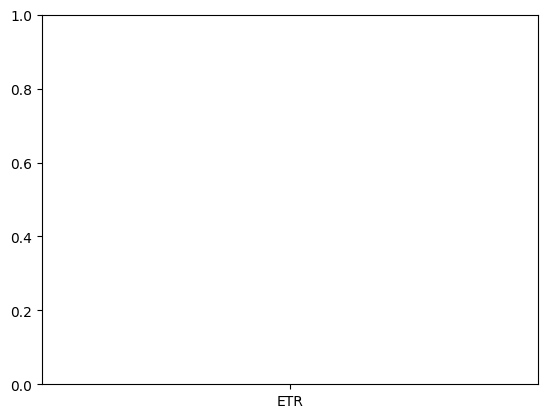

In [ ]:
model_names = ['ETR', 'OMp', 'GBR','xgb','DTR','ABR','RFR','KNR']
r2_scores = [r2_1,r2_2, r2_3,r2_4,r2_5,r2_6,r2_7,r2_8]
plt.bar(model_names, r2_scores)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Scores of Different Models')
plt.ylim([0, 1])  # Set the y-axis limits between 0 and 1 (R2 scores range from 0 to 1)
plt.show()

In [ ]:
plt.plot(model_names, r2_scores, marker='o')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Scores of Different Models')
plt.ylim([0, 1])  # Set the y-axis limits between 0 and 1 (R2 scores range from 0 to 1)
plt.grid(True)  # Add a grid for better readability (optional)
plt.show()